# Workflows de Análise de Dados e Geoestatística

## Módulo 4 - Construindo um Model de Árvore

O objetivo deste módulo e criar um modelo linear (regressão linear simples e múltipla)

### Imports

In [1]:
# paths
import os

# pandas
import pandas as pd
import numpy as np

# data viz
import seaborn as sns
import matplotlib.pyplot as plt

# model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# metrics
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [2]:
# configuring plots of seaborn
sns.set_style("ticks", {'axes.grid':False})
sns.set_context("talk") 

### Helper functions

In [3]:
# directories
def get_directories():
    # getting working paths
    CURRENT_DIR = os.path.dirname(os.path.realpath('__file__'))
    PARENT_DIR = os.path.dirname(CURRENT_DIR)
    #QUERY_DIR = os.path.join(CURRENT_DIR, 'queries')
    DATA_DIR = os.path.join(PARENT_DIR, 'data')
    
    dirs = {
        "CURRENT_DIR" : CURRENT_DIR,
        "PARENT_DIR" : PARENT_DIR,
        #"QUERY_DIR" : QUERY_DIR,
        "DATA_DIR" : DATA_DIR
    }

    return (dirs)


# metadados sobre dataframe
def meta_df(df):
    return pd.DataFrame({'dtypes': df.dtypes,
                         'nmissing': df.isna().sum(),
                         'missing%': round(df.isna().sum()/df.shape[0]*100, 2),
                         'nunique': df.nunique(),
                         'nunique%': round(df.nunique()/df.shape[0]*100, 2),
                         'size': df.shape[0]}, index = df.columns)

In [4]:
get_directories()

{'CURRENT_DIR': 'C:\\Users\\lucas\\Documents\\code\\workflows-geoestatistica-data\\modulo_4',
 'PARENT_DIR': 'C:\\Users\\lucas\\Documents\\code\\workflows-geoestatistica-data',
 'DATA_DIR': 'C:\\Users\\lucas\\Documents\\code\\workflows-geoestatistica-data\\data'}

In [5]:
# importing data

data_dirs = get_directories()
df_jura = pd.read_csv(os.path.join(data_dirs["DATA_DIR"],"silver_jura.csv"))
df_jura.head(10)

,vlLocX,vlLocY,descLanduse,descUnit,vlCadmium,vlCobalt,vlChromium,vlNickel,vlLead,vlZinc,status,rankCadmium,rankCobalt,rankChromium,rankNickel,rankPb,rankZn,descAnomalyZn
0,1.932,1.004,campo,argoviano,0.135,4.520,15.08,5.24,37.00,32.56,NaN,0.00,0.14,0.02,0.03,0.28,0.04,normal
1,1.824,0.999,campo,argoviano,0.165,3.752,18.60,7.08,56.40,44.00,NaN,0.00,0.07,0.06,0.07,0.68,0.12,normal
2,1.883,1.176,campo,argoviano,0.195,3.920,21.80,7.52,49.60,43.20,NaN,0.01,0.10,0.12,0.10,0.56,0.10,normal
3,1.837,1.037,campo,argoviano,0.215,3.880,23.00,8.16,46.80,44.00,NaN,0.01,0.09,0.14,0.11,0.51,0.12,normal
4,3.768,2.775,floresta,kimmeridgiano,0.220,10.800,26.32,17.52,31.88,45.20,NaN,0.02,0.60,0.20,0.37,0.11,0.14,normal
5,1.839,0.995,campo,argoviano,0.225,4.240,24.88,10.12,55.60,56.00,NaN,0.02,0.12,0.17,0.16,0.68,0.26,normal
6,2.537,3.768,campo,argoviano,0.230,3.792,18.20,5.68,26.84,32.08,NaN,0.02,0.08,0.04,0.05,0.04,0.03,normal
7,2.502,3.988,campo,argoviano,0.240,3.760,18.92,5.20,22.36,32.24,NaN,0.03,0.08,0.06,0.03,0.02,0.04,normal
8,1.842,0.989,campo,argoviano,0.240,4.520,27.96,11.32,52.40,56.40,NaN,0.03,0.14,0.26,0.20,0.62,0.26,normal
9,1.897,1.220,campo,argoviano,0.260,3.480,16.24,4.76,27.00,27.20,NaN,0.04,0.04,0.03,0.01,0.05,0.01,normal


In [6]:
meta_df(df_jura)

,dtypes,nmissing,missing%,nunique,nunique%,size
vlLocX,float64,0,0.00,238,94.82,251
vlLocY,float64,0,0.00,241,96.02,251
descLanduse,object,0,0.00,4,1.59,251
descUnit,object,0,0.00,5,1.99,251
vlCadmium,float64,0,0.00,209,83.27,251
vlCobalt,float64,0,0.00,172,68.53,251
vlChromium,float64,0,0.00,198,78.88,251
vlNickel,float64,0,0.00,213,84.86,251
vlLead,float64,0,0.00,192,76.49,251
vlZinc,float64,0,0.00,183,72.91,251


In [7]:
grade_features = ["vlCadmium", "vlCobalt", "vlChromium", "vlNickel", "vlLead", "vlZinc"]

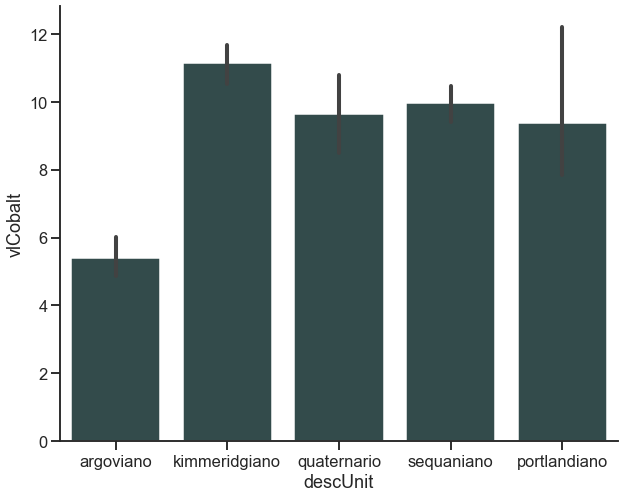

In [8]:
plt.figure(figsize=(10,8))
sns.barplot(x=df_jura['descUnit'], y=df_jura['vlCobalt'], color='darkslategray')
sns.despine()
plt.show()

#### Tree model

In [9]:
# train - test split
X_train, X_test, y_train, y_test = train_test_split(df_jura[grade_features], df_jura['descUnit'], random_state=1, test_size=.27)

y_train = y_train.map(lambda x: 0 if x != 'argoviano' else 1)
y_test = y_test.map(lambda x: 0 if x != 'argoviano' else 1)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(183, 6) (183,)
(68, 6) (68,)


In [10]:
clf = DecisionTreeClassifier()
clf.fit(X=X_train, y=y_train)

y_pred = clf.predict(X=X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [11]:
# how many we got it right?
print(accuracy_score(y_test, y_pred))

# tp / tp + fp -> from retrieved samples, how many are relevant? 
print(precision_score(y_test, y_pred))

# tp / tp + fn -> how many relevant samples are retrieved?
print(recall_score(y_test, y_pred))


print(f1_score(y_test, y_pred))

0.8382352941176471
0.8571428571428571
0.375
0.5217391304347825


In [12]:
fpr, tpr, tr = roc_curve(y_test, y_pred)

<AxesSubplot:>

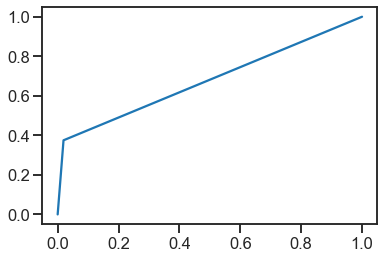

In [13]:
sns.lineplot(x=fpr, y=tpr)

In [14]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [15]:
y_test

67     0
250    1
230    0
161    1
91     0
      ..
189    0
47     1
197    0
40     0
168    0
Name: descUnit, Length: 68, dtype: int64